In [143]:
!pip install biotite

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 10.3 MB/s eta 0:00:0000:0100:01


In [151]:
import biotite
from biotite.structure import get_chains
import biotite.structure.io as strucio 
import numpy as np

def distance_map_compute(ca_coord,eps=1e-8):
    """
    ca_coord : [N_res,3]
    return : [N_res, N_res]
    """
    if isinstance(ca_coord,biotite.structure.AtomArray):
        ca_coord = ca_coord.coord
    elif isinstance(ca_coord,list):
        ca_coord = np.array(ca_coord)
    return np.sqrt(np.sum( (ca_coord[:,None,...] - ca_coord[None,...])**2, axis=-1)+eps)

def get_close_res(ca_coord,res_id,box):
    """
    input : res_id 1-based
    return : neighbor 1-based 
    """
    distance_matrix = distance_map_compute(ca_coord)
    neighbor = np.where(distance_matrix[res_id-1] < box)[0]
    return [i+1 for i in neighbor if i != res_id-1]

def dimer_interface(input_pdb,interface_cutoff=8.0):
    """
    output the dimer interface of a dimer structure
    return : {chain_id:[res_id]} ----- 1-based
    """
    dimer_structure = strucio.load_structure(input_pdb)
    dimer_structure_ca = dimer_structure[dimer_structure.atom_name == "CA"]
    all_chains = get_chains(dimer_structure_ca)
    chain_A_length = sum([1 for i in dimer_structure_ca if i.chain_id == all_chains[0]])
    chain_B_length = sum([1 for i in dimer_structure_ca if i.chain_id == all_chains[1]])
    # domain_boundary = {i:[] for i in all_chains}
    # for atom_num,atom in enumerate(dimer_structure_ca):
    #     domain_boundary[atom.chain_id].append(atom_num+1)
    distance_map = distance_map_compute(dimer_structure_ca.coord)
    # aa_list = []
    domain_interface = {i:[] for i in all_chains}
    for res_A in range(chain_A_length):
        for res_B in range(chain_B_length):
            if np.any(distance_map[res_A][res_B+chain_A_length] < interface_cutoff):
                domain_interface[all_chains[0]].append(res_A+1)
                domain_interface[all_chains[1]].append(res_B+1)
    return domain_interface

In [ ]:
ubiquitin_pdb =  "./Rsp5_Ub.pdb"
test_interface = dimer_interface(ubiquitin_pdb)

In [152]:
def get_distance_map(input_pdb):
    """
    input : pdb file
    return : distance map
    """
    structure = strucio.load_structure(input_pdb)
    structure_ca = structure[structure.atom_name == "CA"]
    structure_c = structure[structure.atom_name == "C"]
    structure_n = structure[structure.atom_name == "N"]
    structure_o = structure[structure.atom_name == "O"]
    return {
        "ca":distance_map_compute(structure_ca.coord),
        "c":distance_map_compute(structure_c.coord),
        "n":distance_map_compute(structure_n.coord),
        "o":distance_map_compute(structure_o.coord)
    }

In [153]:
distance = get_distance_map("PhD/Bioinformatics-Fileds/bioinformatics/NeoR_renum.pdb")

/usr/local/lib/python3.10/dist-packages/biotite/structure/io/pdb/file.py:470: UserWarning: 2044 elements were guessed from atom_name.
  warnings.warn(


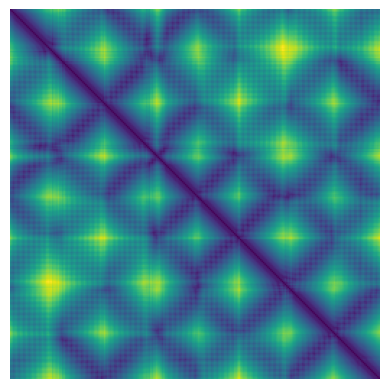

In [165]:
# display CA distance map without colorbar, axes and title
import matplotlib.pyplot as plt
for key in distance.keys():
    plt.imshow(distance[key])
    plt.axis('off')  # hide axes
    plt.savefig(f"PhD/Bioinformatics-Fileds/bioinformatics/NeoR_{key}_distance_map.pdf")

In [149]:
!ls

Megatron-LM  snap	   下载    图片  桌面  视频
PhD	     transformers  公共的  文档  模板  音乐


In [166]:
distance = get_distance_map("PhD/Bioinformatics-Fileds/bioinformatics/test_tm_score.pdb")

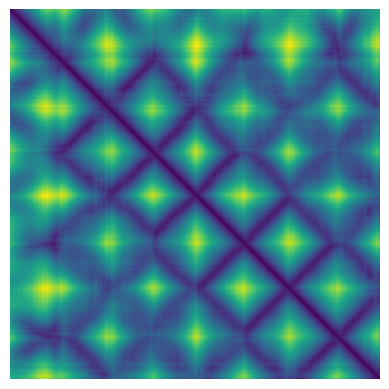

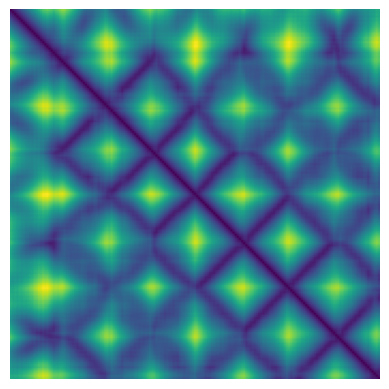

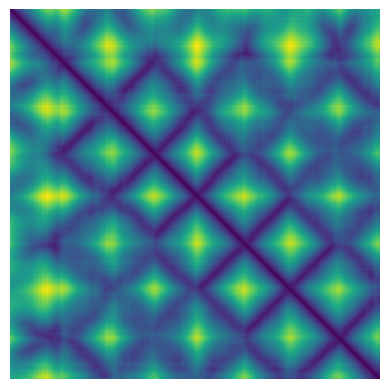

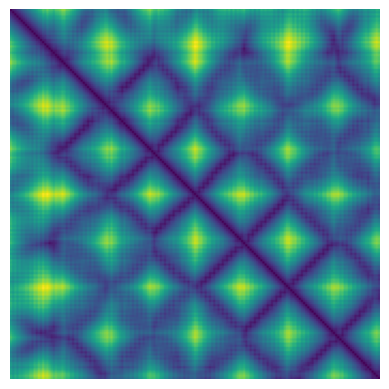

In [167]:
for key in distance.keys():
    plt.imshow(distance[key])
    plt.axis('off')  # hide axes
    plt.show()

In [168]:
29 * 20000 /1e3

580.0